<a href="https://colab.research.google.com/github/quangcrazymen/CS114.M11/blob/main/LabExercise/Lab_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"><b>CS114-MACHINE LEARNING</b></h1>
<h1 align="center"><b>THỰC HÀNH LAB 1</b></h1>

## ***Nhóm CIA***
**THÀNH VIÊN**
Nguyễn Đỗ Quang - 20520720 (KHCL) 

Trần Nguyễn Quỳnh Anh - 19521217

Đinh Hoàng Linh Đan - 19521309

# Nội dung


In [ ]:
#Dữ liệu train: https://cs.uit.edu.vn/data2.txt
#Dữ liệu test: https://cs.uit.edu.vn/data3.txt
#https://cs.uit.edu.vn/data4.txt

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#data url
data2_url = 'https://cs.uit.edu.vn/data2.txt'
data3_url = 'https://cs.uit.edu.vn/data3.txt'
data4_url = 'https://cs.uit.edu.vn/data4.txt'

header = ['size','time']
data2=pd.read_csv(data2_url,names=header)
data3=pd.read_csv(data3_url,names=header)
data4=pd.read_csv(data4_url,names=header)

#Uncomment Line 17 to reduce training dataset size
#data2=data2[data2['size']>0.4*1e7]

print(len(data2))
x2=np.array(data2['size']).reshape(-1,1)
y2=np.array(data2['time']).reshape(-1,1)

y3=np.array(data3['time']).reshape(-1,1)
x3=np.array(data3['size']).reshape(-1,1)

x4=np.array(data4['size']).reshape(-1,1)
y4=np.array(data4['time']).reshape(-1,1)

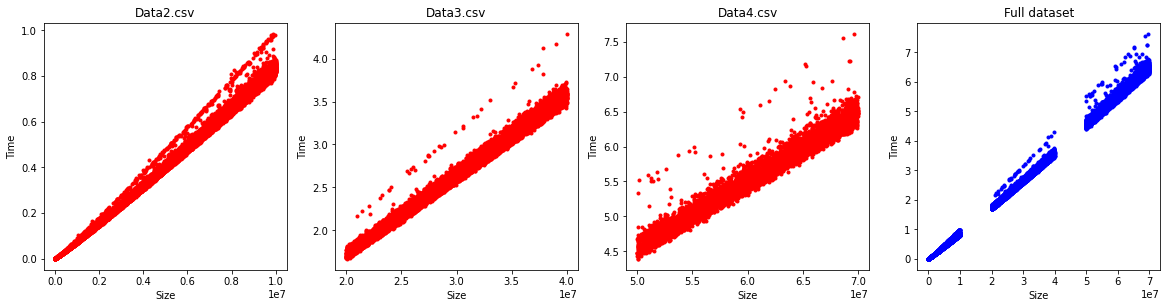

In [ ]:
plt.figure(figsize=(20,10))
#data2
plt.subplot(2,4,1)
plt.plot(x2,y2,'r.')
plt.xlabel('Size')
plt.ylabel('Time')
plt.title('Data2.csv')

#data3
plt.subplot(2,4,2)
plt.plot(x3,y3,'r.')
plt.xlabel('Size')
plt.ylabel('Time')
plt.title('Data3.csv')

#data4
plt.subplot(2,4,3)
plt.plot(x4,y4,'r.')
plt.xlabel('Size')
plt.ylabel('Time')
plt.title('Data4.csv')

#full dataset
plt.subplot(2, 4, 4)
plt.plot(x2, y2, 'b.')
plt.plot(x3, y3, 'b.')
plt.plot(x4, y4, 'b.')
plt.xlabel('Size')
plt.ylabel('Time')
plt.title('Full dataset')
plt.show()

**Linear Regression**

In [ ]:
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error

def printResult(y,y_pre):
  data_mse = mean_squared_error(y,y_pre)
  data_mae = mean_absolute_error(y, y_pre)
  print("Mean squared error: ", data_mse)
  print("Mean absolute error: ", data_mae)

def plotResult(x,y,y_pre,title):
  plt.figure(figsize=(5,5))
  plt.plot(x,y,'b.')
  plt.plot(x,y_pre,'r-')
  plt.xlabel('Size')
  plt.ylabel('Time')
  plt.title(title)
  plt.show

**y=θx**

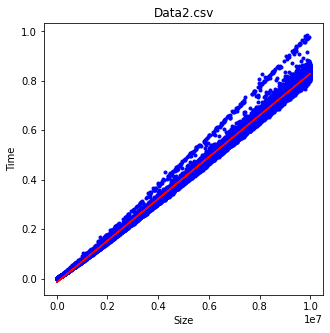

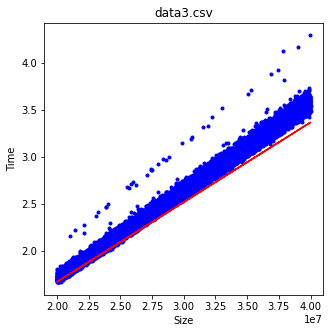

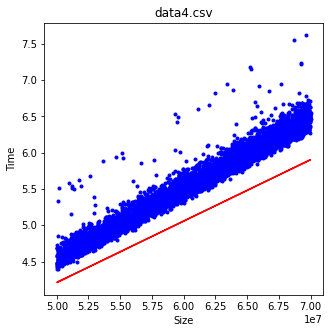

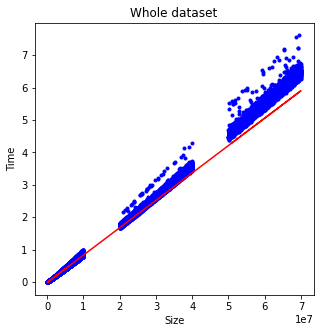

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge  #when use this ?

linearRegressor_2=Ridge(alpha = -4000).fit(x2,y2)
#linearRegressor_2=LinearRegression().fit(x2,y2)

#print('--Data2--')
y2_pre = linearRegressor_2.predict(x2)
plotResult(x2,y2,y2_pre,'Data2.csv')

# print("--Data3--")
y3_pre = linearRegressor_2.predict(x3)
plotResult(x3, y3, y3_pre, 'data3.csv')

# print("--Data4--")
y4_pre = linearRegressor_2.predict(x4)
plotResult(x4, y4, y4_pre, 'data4.csv')

xFull = np.concatenate((x2,x3,x4))
yFull=np.concatenate((y2,y3,y4))
yPredictFull = np.concatenate((y2_pre,y3_pre,y4_pre))
plotResult(xFull,yFull,yPredictFull,'Whole dataset')

In [ ]:
print("==DATA_2==")
print("Score:",linearRegressor_2.score(x2, y2))
printResult(y2, y2_pre)
print("==DATA_3==")
print("Score:",linearRegressor_2.score(x3, y3))
printResult(y3, y3_pre)
print("==DATA_4==")
print("Score:",linearRegressor_2.score(x4, y4))
printResult(y4, y4_pre)

==DATA_2==
Score: 0.9975924993345858
Mean squared error:  0.00014337728721748835
Mean absolute error:  0.008291970317762519
==DATA_3==
Score: 0.9284132208349583
Mean squared error:  0.020664949397545353
Mean absolute error:  0.12271198006923853
==DATA_4==
Score: 0.31568396053667247
Mean squared error:  0.22348476817423216
Mean absolute error:  0.4520113867328612


**y=θ*x*log2(x)**

In [ ]:
import math

def newFeature(x):
  return x * np.log2(x)# * x*log(x)
lR_2_new = Ridge(alpha = -4000).fit(newFeature(x2), y2)
#lR_2_new = LinearRegression().fit(newFeature(x_2), y_2)
y_2_pre = lR_2_new.predict(newFeature(x2))
y_3_pre = lR_2_new.predict(newFeature(x3))
y_4_pre = lR_2_new.predict(newFeature(x4))

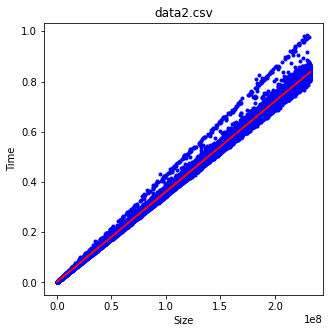

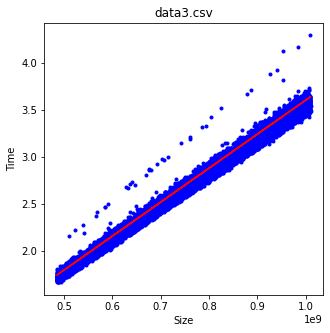

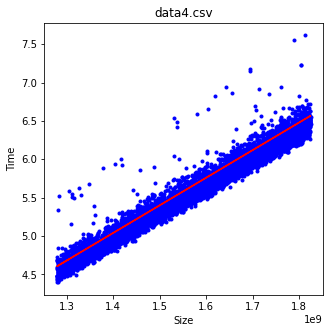

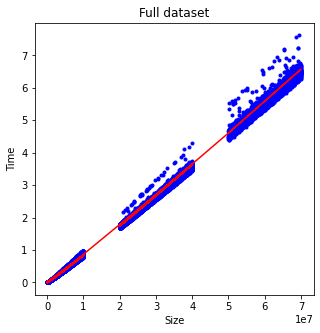

In [ ]:
# print("===== DATA 2 =====")
plotResult(newFeature(x2), y2, y_2_pre, 'data2.csv')

# print("===== DATA 3 =====")
plotResult(newFeature(x3), y3, y_3_pre, 'data3.csv')

# print("===== DATA 4 =====")
plotResult(newFeature(x4), y4, y_4_pre, 'data4.csv')

x_full = np.concatenate((x2, x3, x4))
y_full = np.concatenate((y2, y3, y4))
y_pre_full = np.concatenate((y_2_pre, y_3_pre, y_4_pre))
plotResult(x_full, y_full, y_pre_full, 'Full dataset')

In [ ]:
print("==DATA_2==")
print("Score:",lR_2_new.score(newFeature(x2), y2))
printResult(y2, y_2_pre)
print("==DATA_3==")
print("Score:",lR_2_new.score(newFeature(x3), y3))
printResult(y3, y_3_pre)
print("==DATA_4==")
print("Score:",lR_2_new.score(newFeature(x4), y4))
printResult(y4, y_4_pre)

==DATA_2==
Score: 0.9916037869471442
Mean squared error:  0.00018937201365366047
Mean absolute error:  0.009479678562927717
==DATA_3==
Score: 0.9829200186284214
Mean squared error:  0.004930476756622265
Mean absolute error:  0.05509914883019714
==DATA_4==
Score: 0.9441157817947989
Mean squared error:  0.018250736253357793
Mean absolute error:  0.1051476120403628


***Increase Dimension***

In [ ]:
def newFeatures(X_input):
  X=X_input
  X=np.hstack((X,np.log2(X_input)))
  X=np.hstack((X,X_input*np.log2(X_input)))
  X=np.hstack((X,X_input*X_input))
  #X=np.hstack((X,np.sqrt(X_input)))
  return X

multiLinearRegressor= LinearRegression().fit(newFeatures(x2),y2)
y2_pre=multiLinearRegressor.predict(newFeatures(x2))
y3_pre=multiLinearRegressor.predict(newFeatures(x3))
y3_pre=multiLinearRegressor.predict(newFeatures(x3))

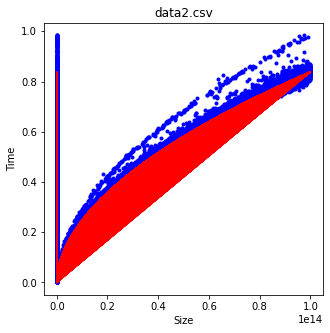

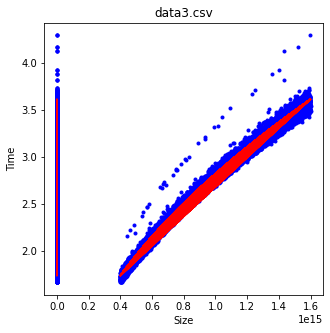

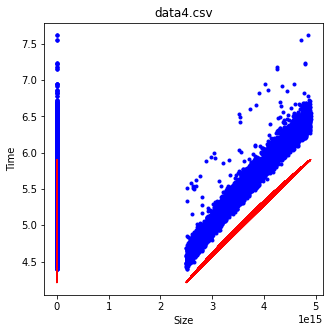

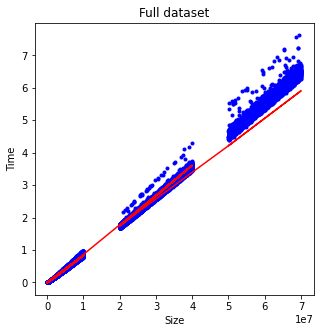

In [ ]:
# print("===== DATA 2 =====")
plotResult(newFeatures(x2), y2, y2_pre, 'data2.csv')

# print("===== DATA 3 =====")
plotResult(newFeatures(x3), y3, y3_pre, 'data3.csv')

# print("===== DATA 4 =====")
plotResult(newFeatures(x4), y4, y4_pre, 'data4.csv')

x_full = np.concatenate((x2, x3, x4))
y_full = np.concatenate((y2, y3, y4))
y_pre_full = np.concatenate((y2_pre, y3_pre, y4_pre))
plotResult(x_full, y_full, y_pre_full, 'Full dataset')

In [ ]:
print("==DATA_2==")
print("Score:",multiLinearRegressor.score(newFeatures(x2), y2))
printResult(y2, y_2_pre)
print("==DATA_3==")
print("Score:",multiLinearRegressor.score(newFeatures(x3), y3))
printResult(y3, y_3_pre)
print("==DATA_4==")
print("Score:",multiLinearRegressor.score(newFeatures(x4), y4))
printResult(y4, y_4_pre)

==DATA_2==
Score: 0.9979530945606605
Mean squared error:  0.00012203439798746088
Mean absolute error:  0.006899424814228195
==DATA_3==
Score: 0.985515722513595
Mean squared error:  0.005344034781896773
Mean absolute error:  0.057837441009021544
==DATA_4==
Score: 0.9552342358292145
Mean squared error:  0.01983420617968255
Mean absolute error:  0.11175157703649677


***Fit Equation***

y = 𝞱_1 x + 𝞱_2x^2 + 𝞱_3*log(x) +𝞱_4*x*log(x) + 𝞱_5*sqrt(x)

Result:

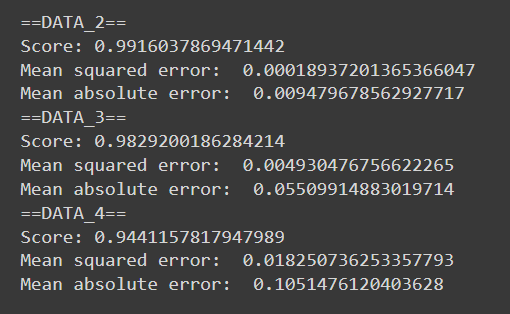

***Fit Equation***

y = 𝞱_1 x + 𝞱_2x^2 + 𝞱_3*log(x) +𝞱_4*x*log(x)

Result:

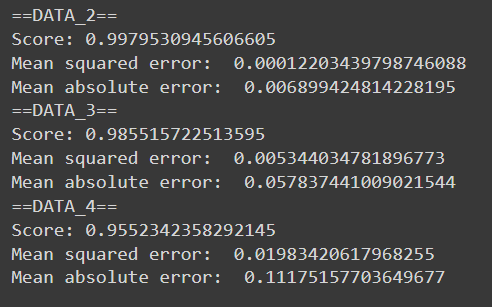

**Nhận xét:**

Sau khi thay đổi feature từ x sang xlogx, nhóm ém nhận thấy performance tăng lên đáng kể, đặc biệt là khi dự đoán trên data4 score tăng từ 31.6% lên đến 94.4%.

Nhóm quyết định tăng số lượng feature lên, và trường hợp tốt nhất là (x,log(x),xlog(x),x^2)
cho kết quả lần lượt là cho data2,data3,data4 là: 99.8%, 98.6% và 95.5%. 